<a href="https://colab.research.google.com/github/naufalmaul/Dokumentasi-Massive/blob/main/Text_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification


pretrained= "mdhugol/indonesia-bert-sentiment-classification"

model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)


In [ ]:
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}


In [ ]:
def get_sentiment(text):
    result = sentiment_analysis(text)
    status = label_index[result[0]['label']]
    score = result[0]['score']
    return status, score

In [ ]:
# Data teks yang akan dianalisis
texts = [
 #positif (10)
    "Museum B yang saya kunjungi tempatnya sangat artistik",
    "Museum C memiliki koleksi yang sangat lengkap dan informatif",
    "Museum E adalah tempat yang menarik untuk belajar sejarah",
    "Museum G memiliki panduan yang sangat membantu",
    "Museum I suasananya sangat nyaman dan tenang",
    "Museum N memiliki banyak aktivitas edukatif untuk anak-anak",
    "Museum P interiornya sangat menarik dan modern",
    "Museum R tempatnya cukup luas dan nyaman",
    "Museum U memiliki banyak koleksi langka dan bersejarah",
    "Museum W menyediakan banyak informasi yang bermanfaat",

 #negatif (14)
    "Museum A yang saya kunjungi tempatnya kurang bersih",
    "Museum D fasilitasnya kurang memadai dan perlu diperbaiki",
    "Museum F sangat berantakan dan tidak teratur",
    "Museum H tidak memiliki banyak koleksi menarik",
    "Museum J tiket masuknya terlalu mahal untuk fasilitas yang ditawarkan",
    "Museum M pencahayaannya kurang bagus",
    "Museum O tidak memiliki area parkir yang memadai",
    "Museum Q sulit untuk menemukan informasi yang jelas tentang pameran",
    "Museum T kurang terawat dan banyak area yang rusak",
    "Museum X tidak memiliki banyak petunjuk arah",
    "Museum Z terlalu gelap dan membingungkan",
    "Museum BB kurang lengkap koleksinya",
    "Museum DD sangat membosankan dan monoton",
    "Museum FF memiliki staf yang tidak ramah",


]


In [ ]:
# Mengumpulkan hasil analisis sentimen
sentiments = {'positive': 0, 'neutral': 0, 'negative': 0}
scores = {'positive': 0, 'neutral': 0, 'negative': 0}

for text in texts:
    status, score = get_sentiment(text)
    sentiments[status] += 1
    scores[status] += score


In [ ]:
# Menyiapkan data untuk diagram batang
categories = list(sentiments.keys())
counts = list(sentiments.values())
average_scores = [scores[cat] / counts[i] if counts[i] > 0 else 0 for i, cat in enumerate(categories)]
y_pos = np.arange(len(categories))

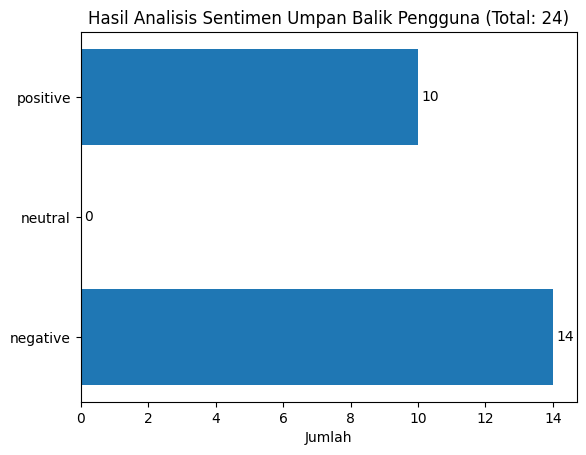

In [ ]:
# Menampilkan total masing-masing sentimen
total_sentiments = sum(sentiments.values())
title = f'Hasil Analisis Sentimen Umpan Balik Pengguna (Total: {total_sentiments})'

# Membuat diagram batang horizontal
fig, ax = plt.subplots()

ax.barh(y_pos, counts, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(categories)
ax.invert_yaxis()  # Urutkan kategori dari atas ke bawah
ax.set_xlabel('Jumlah')
ax.set_title(title)

# Menambahkan jumlah masing-masing sentimen di dalam diagram
for i, count in enumerate(counts):
    ax.text(count + 0.1, i, str(count), ha='left', va='center')

# Menampilkan diagram
plt.show()


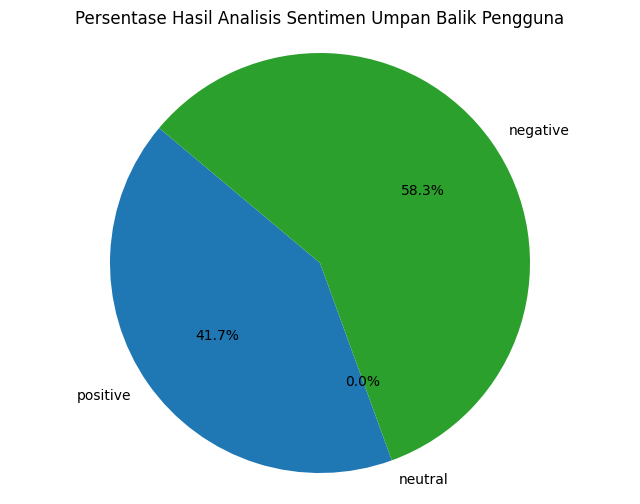

In [ ]:
# Persentase masing-masing sentimen
percentages = [count / total_sentiments * 100 for count in counts]

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Hasil Analisis Sentimen Umpan Balik Pengguna')
plt.axis('equal')  # Agar lingkaran menjadi bulat

# Menampilkan pie chart
plt.show()